# Industry

In order to optimize production costs, the metallurgical plant LLC “So we harden steel” decided to reduce energy consumption at the steel processing stage. We have to build a model that will predict the temperature of steel.

<b>Description of the processing stage</b>

The steel is processed in a metal ladle with a capacity of about 100 tons. To ensure that the ladle can withstand high temperatures, the inside is lined with refractory bricks. Molten steel is poured into a ladle and heated to the desired temperature with graphite electrodes. They are installed in the bucket lid.

Sulfur is removed from the alloy (desulfurization), the chemical composition is adjusted by adding impurities, and samples are taken. Steel is alloyed - its composition is changed - by feeding pieces of the alloy from a bunker for bulk materials or wire through a special tribe apparatus (English tribe, “mass”).

Before introducing alloying additives for the first time, the temperature of the steel is measured and its chemical analysis is performed. Then the temperature is raised for several minutes, alloying materials are added and the alloy is purged with an inert gas. Then it is mixed and measurements are taken again. This cycle is repeated until the target chemical composition and optimal melting temperature are achieved.

Then the molten steel is sent for finishing of the metal or enters a continuous casting machine. From there the finished product comes out in the form of slabs (English *slab*, “slab”).

<b>Description of data</b>

The data consists of files obtained from different sources:

- `data_arc.csv` — data about electrodes;
- `data_bulk.csv` — data on the supply of bulk materials (volume);
- `data_bulk_time.csv` *—* data on the supply of bulk materials (time);
- `data_gas.csv` — data on purging the alloy with gas;
- `data_temp.csv` — temperature measurement results;
- `data_wire.csv` — data on wire materials (volume);
- `data_wire_time.csv` — data about wire materials (time).

In all files, the key column contains the batch number. There may be several lines in the files with the same key value: they correspond to different iterations of processing.

## Loading data

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Let's load the data

In [2]:
try:
    data_arc = pd.read_csv('./final_steel/data_arc.csv')
    data_bulk = pd.read_csv('./final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('./final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('./final_steel/data_gas.csv')
    data_temp = pd.read_csv('./final_steel/data_temp.csv')
    data_wire = pd.read_csv('./final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('./final_steel/data_wire_time.csv')

except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')


In [3]:
data_all = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]
data_all_txt = ['data_arc', 'data_bulk', 'data_bulk_time', 'data_gas', 'data_temp', 'data_wire', 'data_wire_time']

Let's print the first 5 lines according to our data

In [4]:
for i in range(len(data_all)):
    print('Информация по таблице', data_all_txt[i])
    display(data_all[i].head())
    print('*' * 100)

Информация по таблице data_arc


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


****************************************************************************************************
Информация по таблице data_bulk


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


****************************************************************************************************
Информация по таблице data_bulk_time


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


****************************************************************************************************
Информация по таблице data_gas


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


****************************************************************************************************
Информация по таблице data_temp


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


****************************************************************************************************
Информация по таблице data_wire


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****************************************************************************************************
Информация по таблице data_wire_time


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****************************************************************************************************


We will show basic information on our data

In [5]:
for i in range(len(data_all)):
    print('Информация по таблице', data_all_txt[i])
    print(data_all[i].info())
    print('*' * 100)

Информация по таблице data_arc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None
****************************************************************************************************
Информация по таблице data_bulk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   

We will show in % the number of gaps in our data

In [6]:
for i in range(len(data_all)):
    print('Информация по таблице', data_all_txt[i])
    display(data_all[i].isnull().sum() / len(data_all[i]))
    print('*' * 100)

Информация по таблице data_arc


key                     0.0
Начало нагрева дугой    0.0
Конец нагрева дугой     0.0
Активная мощность       0.0
Реактивная мощность     0.0
dtype: float64

****************************************************************************************************
Информация по таблице data_bulk


key        0.000000
Bulk 1     0.919463
Bulk 2     0.992969
Bulk 3     0.585171
Bulk 4     0.675935
Bulk 5     0.975391
Bulk 6     0.815916
Bulk 7     0.992010
Bulk 8     0.999680
Bulk 9     0.993928
Bulk 10    0.943752
Bulk 11    0.943432
Bulk 12    0.217002
Bulk 13    0.994247
Bulk 14    0.103228
Bulk 15    0.281560
dtype: float64

****************************************************************************************************
Информация по таблице data_bulk_time


key        0.000000
Bulk 1     0.919463
Bulk 2     0.992969
Bulk 3     0.585171
Bulk 4     0.675935
Bulk 5     0.975391
Bulk 6     0.815916
Bulk 7     0.992010
Bulk 8     0.999680
Bulk 9     0.993928
Bulk 10    0.943752
Bulk 11    0.943432
Bulk 12    0.217002
Bulk 13    0.994247
Bulk 14    0.103228
Bulk 15    0.281560
dtype: float64

****************************************************************************************************
Информация по таблице data_gas


key      0.0
Газ 1    0.0
dtype: float64

****************************************************************************************************
Информация по таблице data_temp


key             0.000000
Время замера    0.000000
Температура     0.182373
dtype: float64

****************************************************************************************************
Информация по таблице data_wire


key       0.000000
Wire 1    0.008439
Wire 2    0.649789
Wire 3    0.979552
Wire 4    0.995456
Wire 5    0.999675
Wire 6    0.976306
Wire 7    0.996430
Wire 8    0.993833
Wire 9    0.990587
dtype: float64

****************************************************************************************************
Информация по таблице data_wire_time


key       0.000000
Wire 1    0.008439
Wire 2    0.649789
Wire 3    0.979552
Wire 4    0.995456
Wire 5    0.999675
Wire 6    0.976306
Wire 7    0.996430
Wire 8    0.993833
Wire 9    0.990587
dtype: float64

****************************************************************************************************


### Conclusion

We have 7 tables with the necessary information. All tables have a 'key' column - we will use it later to combine our tables.

We will not use the data_bulk_time and data_wire_time tables in the future, because for our future model, it does not matter at what time certain materials are served.

There are a lot of gaps in the data_bulk and data_wire tables. Gaps indicate that no additional materials were added at a particular step for a given iteration, so we will replace all gaps with 0.

Also in some indicators we will need to change the data type.

Let's start analyzing the data

## Exploratory data analysis

Next, we will process the files we need one by one

### Let's analyze and prepare data from the data_arc file

Let's check if there is a correlation between Active and Reactive powers in the data_arc table

In [7]:
data_arc.corr()

,key,Активная мощность,Реактивная мощность
key,1.000000,-0.021382,-0.004396
Активная мощность,-0.021382,1.000000,0.054437
Реактивная мощность,-0.004396,0.054437,1.000000


There is no correlation. This tells us that we need to take both power options

Converting the data type

In [8]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])

display(data_arc.head())

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Let's add a column with the time between the beginning and end of arc heating in seconds

In [9]:
data_arc['working_time'] = (data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']).astype('timedelta64[s]')
display(data_arc.head())

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,working_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0


Let's build a graph and look at the distribution of powers and intervals

<AxesSubplot:title={'center':'Интервал нагрева дугой, сек'}, ylabel='Frequency'>

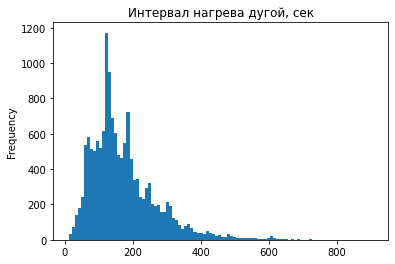

In [10]:
data_arc['working_time'].plot(kind='hist', bins=100, title='Интервал нагрева дугой, сек')

Basically, the distribution occurs in the range from 0 to 200. Then it declines.

<b>Let's look at the power<b>

Let's sort the value in ascending order.

In [11]:
data_arc['Реактивная мощность'].sort_values()

9780    -715.504924
5596       0.020806
2419       0.021154
4914       0.022485
4633       0.022983
            ...    
13760      2.335088
12424      2.397032
9361       2.459959
9226       2.504206
7799       2.676388
Name: Реактивная мощность, Length: 14876, dtype: float64

We have one very large outlier. Let's delete it

In [12]:
data_arc = data_arc.query('`Реактивная мощность` > 0')

<AxesSubplot:title={'center':'Распределение активной мощности'}, ylabel='Frequency'>

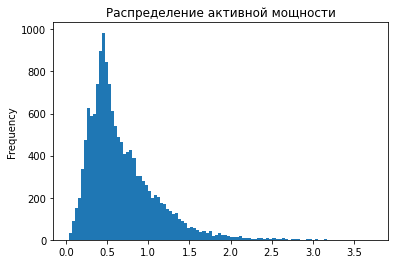

In [13]:
data_arc['Активная мощность'].plot(kind='hist', bins=100, title='Распределение активной мощности')

<AxesSubplot:title={'center':'Распределение реактивной мощности'}, ylabel='Frequency'>

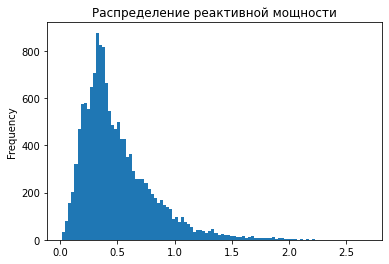

In [14]:
data_arc['Реактивная мощность'].plot(kind='hist', bins=100, title='Распределение реактивной мощности')

In [15]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,working_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0


Remove unnecessary columns

In [16]:
data_arc.drop(columns = ['Начало нагрева дугой', 'Конец нагрева дугой'], axis = 1)


,key,Активная мощность,Реактивная мощность,working_time
0,1,0.976059,0.687084,228.0
1,1,0.805607,0.520285,185.0
2,1,0.744363,0.498805,172.0
3,1,1.659363,1.062669,365.0
4,1,0.692755,0.414397,148.0
...,...,...,...,...
14871,3241,0.533670,0.354439,157.0
14872,3241,0.676604,0.523631,180.0
14873,3241,0.733899,0.475654,184.0
14874,3241,0.220694,0.145768,57.0


Let's group the data by the 'key' column

In [17]:
data_arc = data_arc.groupby('key').sum()
data_arc

,Активная мощность,Реактивная мощность,working_time
key,,,
1,4.878147,3.183241,1098.0
2,3.052598,1.998112,811.0
3,2.525882,1.599076,655.0
4,3.209250,2.060298,741.0
5,3.347173,2.252643,869.0
...,...,...,...
3237,3.932467,2.828459,909.0
3238,2.106529,1.681182,546.0
3239,4.666754,3.111617,1216.0


### data_bulk

Let's add the 'key' column to the index

In [18]:
data_bulk = data_bulk.set_index('key')

Replace all NaNs with 0

In [19]:
data_bulk = data_bulk.fillna(0)

Let's add a column with the sum for all stages of adding bulk materials

In [20]:
data_bulk['total_bulk'] = data_bulk.sum(axis=1)
data_bulk

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,total_bulk
key,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,0.0,130.0,206.0,758.0
3238,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,108.0,106.0,594.0
3239,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,158.0,0.0,270.0,88.0,630.0


Let's leave only the totals

In [21]:
data_bulk = data_bulk['total_bulk']
data_bulk

key
1       553.0
2       582.0
3       544.0
4       595.0
5       584.0
        ...  
3237    758.0
3238    594.0
3239    630.0
3240    272.0
3241    232.0
Name: total_bulk, Length: 3129, dtype: float64

Let's look at the distribution

<AxesSubplot:title={'center':'Сумма подачи сыпучих материалов, обьем'}, ylabel='Frequency'>

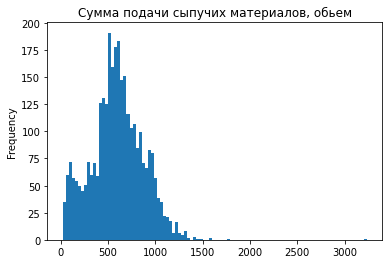

In [22]:
data_bulk.plot(kind='hist', bins=100, title='Сумма подачи сыпучих материалов, обьем')

Convert to dataframe

In [23]:
data_bulk = data_bulk.to_frame(name='total_bulk')

In [24]:
data_bulk.head()

,total_bulk
key,
1,553.0
2,582.0
3,544.0
4,595.0
5,584.0


### data_gas

Let's add the 'key' column to the index

In [25]:
data_gas = data_gas.set_index('key')

Let's look at the distribution

<AxesSubplot:ylabel='Frequency'>

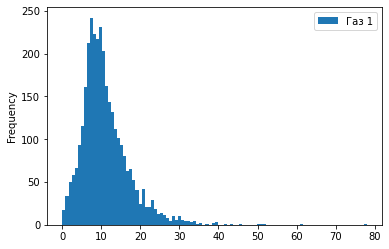

In [26]:
data_gas.plot(kind='hist', bins=100)

In [27]:
data_gas.head()

,Газ 1
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692


### data_temp  

Let's find iterations with one temperature measurement

In [28]:
data_temp_delete = data_temp.groupby('key')['Температура'].count().to_frame(name='кол-во_замеров')
data_temp_delete = data_temp_delete.query('`кол-во_замеров` == 1')
data_temp_delete

,кол-во_замеров
key,
195,1
279,1
2500,1
2501,1
2502,1
...,...
3237,1
3238,1
3239,1


Let's remove such iterations from our dataset

In [29]:
data_temp_delete = data_temp_delete.index

In [30]:
print(data_temp.shape)
data_temp = data_temp.query('key not in @data_temp_delete')
print(data_temp.shape)

(15907, 3)
(12265, 3)


Let's sort our data by Measurement Time and create two variables with the first temperature and the last

In [31]:
data_temp = data_temp.sort_values(by='Время замера')

first_temperature = data_temp.groupby(by='key', as_index=False)['Температура'].first()
last_temperature = data_temp.groupby(by='key', as_index=False)['Температура'].last()

In [32]:
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Now merge into one table

In [33]:
data_temp_new = first_temperature
data_temp_new = data_temp_new.rename(columns={'Температура': 'первый_замер_температуры'})
data_temp_new['последний_замер_температуры'] = last_temperature['Температура']
data_temp_new = data_temp_new.set_index('key')
data_temp_new.head()

,первый_замер_температуры,последний_замер_температуры
key,,
1,1571.0,1613.0
2,1581.0,1602.0
3,1596.0,1599.0
4,1601.0,1625.0
5,1576.0,1602.0


We have a table with the 'key' index and with the temperature results at the first and last measurement.

Let's check how many iterations I have the same first and last temperatures

In [34]:
data_temp_new[data_temp_new['первый_замер_температуры'] == data_temp_new['последний_замер_температуры']].shape[0]

42

Let's leave such iterations, because it is quite possible that the first and last temperature measurements have the same value

### data_wire

Let's add the 'key' column to the index

In [35]:
data_wire = data_wire.set_index('key')

Replace all NaNs with 0

In [36]:
data_wire = data_wire.fillna(0)

Let's add a column with the sum of all stages of adding wire

In [37]:
data_wire['total_wire'] = data_wire.sum(axis=1)
data_wire.head()

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,total_wire
key,,,,,,,,,,
1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.352796


Let's leave only the totals

In [38]:
data_wire = data_wire['total_wire']
data_wire.head()

key
1    60.059998
2    96.052315
3    91.160157
4    89.063515
5    98.352796
Name: total_wire, dtype: float64

Let's look at the distribution

<AxesSubplot:title={'center':'Сумма проволочных материалов, обьем'}, ylabel='Frequency'>

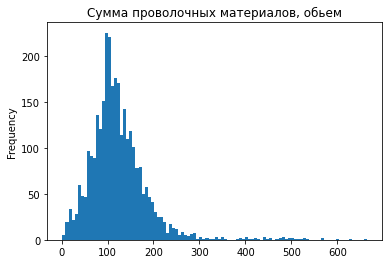

In [39]:
data_wire.plot(kind='hist', bins=100, title='Сумма проволочных материалов, обьем')

Convert to dataframe

In [40]:
data_wire = data_wire.to_frame(name='total_wire')

In [41]:
data_wire.head()

,total_wire
key,
1,60.059998
2,96.052315
3,91.160157
4,89.063515
5,98.352796


### Let's collect all the data into one dataframe

In [42]:
df = data_arc
df = df.merge(data_bulk, how='inner', on='key')
df = df.merge(data_gas, how='inner', on='key')
df = df.merge(data_temp_new, how='inner', on='key')
df = df.merge(data_wire, how='inner', on='key')
df.head()

,Активная мощность,Реактивная мощность,working_time,total_bulk,Газ 1,первый_замер_температуры,последний_замер_температуры,total_wire
key,,,,,,,,
1,4.878147,3.183241,1098.0,553.0,29.749986,1571.0,1613.0,60.059998
2,3.052598,1.998112,811.0,582.0,12.555561,1581.0,1602.0,96.052315
3,2.525882,1.599076,655.0,544.0,28.554793,1596.0,1599.0,91.160157
4,3.209250,2.060298,741.0,595.0,18.841219,1601.0,1625.0,89.063515
5,3.347173,2.252643,869.0,584.0,5.413692,1576.0,1602.0,98.352796


Let's see if there is a correlation in our data

<AxesSubplot:>

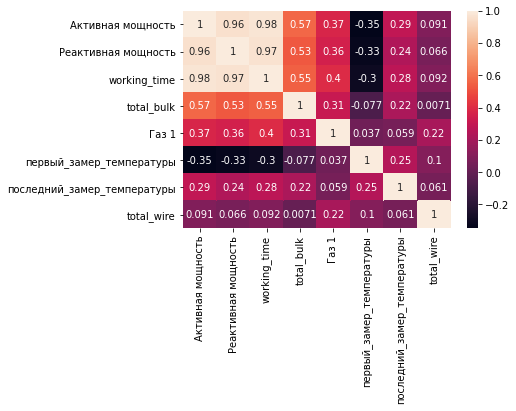

In [43]:
sns.heatmap(df.corr(), annot=True)

We have a strong direct correlation between Active power, Reactive power and working_time. In the future, you can remove unnecessary data. But we will check both ways.

In [44]:
df.head()

,Активная мощность,Реактивная мощность,working_time,total_bulk,Газ 1,первый_замер_температуры,последний_замер_температуры,total_wire
key,,,,,,,,
1,4.878147,3.183241,1098.0,553.0,29.749986,1571.0,1613.0,60.059998
2,3.052598,1.998112,811.0,582.0,12.555561,1581.0,1602.0,96.052315
3,2.525882,1.599076,655.0,544.0,28.554793,1596.0,1599.0,91.160157
4,3.209250,2.060298,741.0,595.0,18.841219,1601.0,1625.0,89.063515
5,3.347173,2.252643,869.0,584.0,5.413692,1576.0,1602.0,98.352796


<b>Let's check our final dataframe for emissions.</b>

Активная мощность


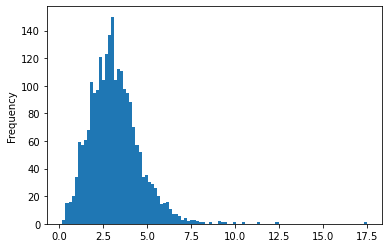

Реактивная мощность


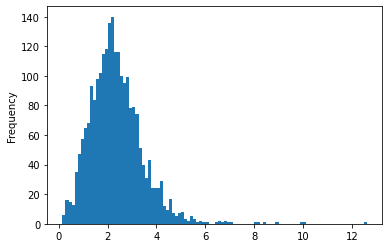

working_time


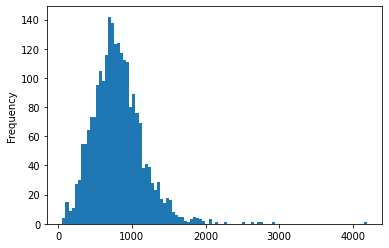

total_bulk


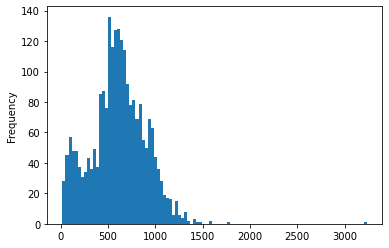

Газ 1


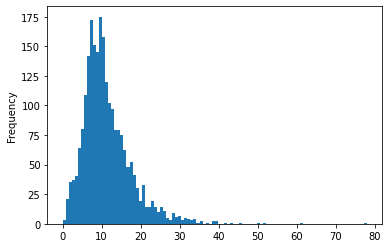

первый_замер_температуры


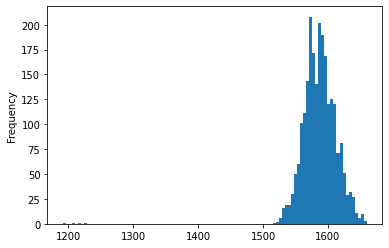

последний_замер_температуры


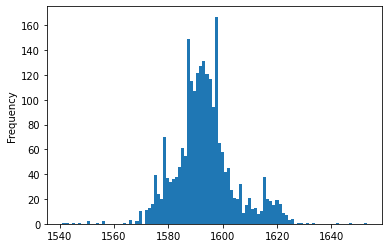

total_wire


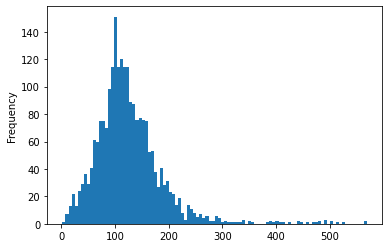

In [45]:
col = df.columns

for i in col:
    print(i)
    df[i].plot(kind='hist', bins=100)
    plt.show()

Активная мощность


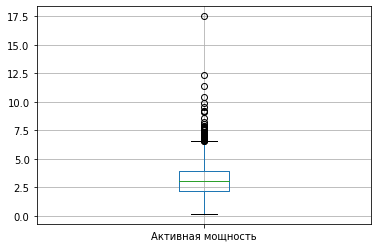

Реактивная мощность


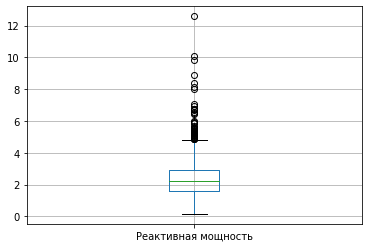

working_time


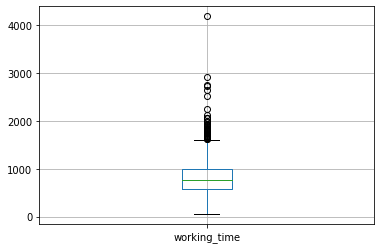

total_bulk


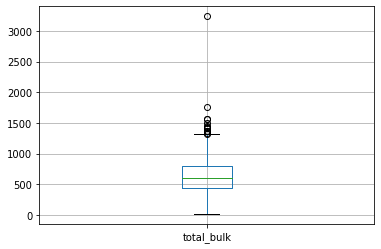

Газ 1


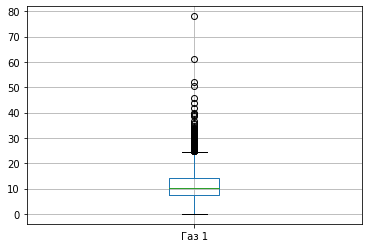

первый_замер_температуры


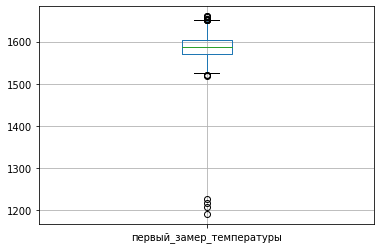

последний_замер_температуры


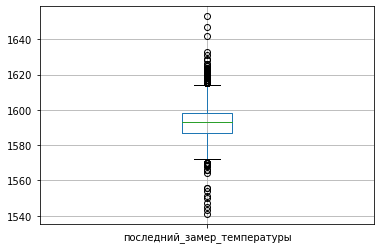

total_wire


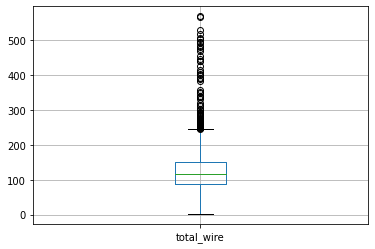

In [46]:
for i in col:
    print(i)
    df.boxplot(column=i)
    plt.show()

We have outliers in all columns. Next, remove outliers. Replace data points that lie outside the lower and upper boundaries (Q1 and Q3) with Zero value.

In [47]:
for x in ['Активная мощность', 'Реактивная мощность', 'working_time', 'total_bulk', 'Газ 1', 'total_wire', 'первый_замер_температуры', 'последний_замер_температуры']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [48]:
df.isnull().sum()

Активная мощность               42
Реактивная мощность             49
working_time                    42
total_bulk                      13
Газ 1                           93
первый_замер_температуры        18
последний_замер_температуры    181
total_wire                      84
dtype: int64

Let's delete objects with empty values ​​(since these are outliers)

In [49]:
df = df.dropna(axis=0)

In [50]:
df.isnull().sum()

Активная мощность              0
Реактивная мощность            0
working_time                   0
total_bulk                     0
Газ 1                          0
первый_замер_температуры       0
последний_замер_температуры    0
total_wire                     0
dtype: int64

Let's build the final histogram

Активная мощность


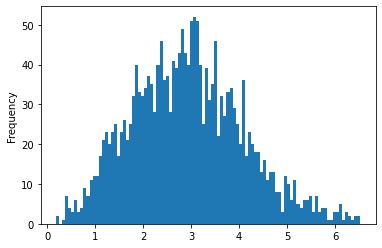

Реактивная мощность


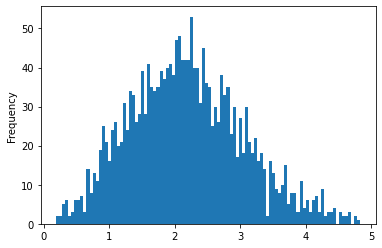

working_time


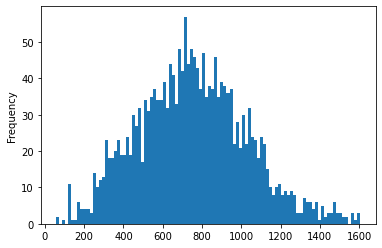

total_bulk


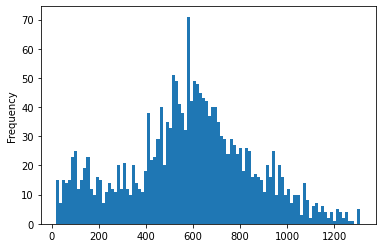

Газ 1


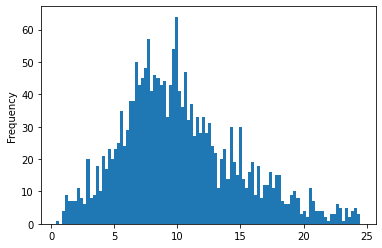

первый_замер_температуры


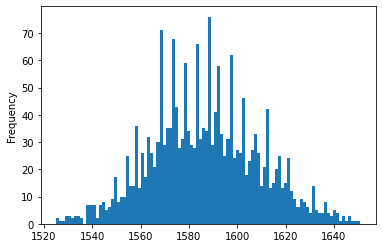

последний_замер_температуры


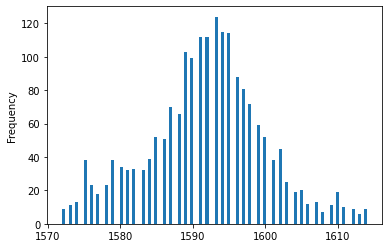

total_wire


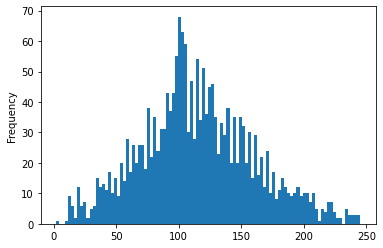

In [51]:
for i in col:
    print(i)
    df[i].plot(kind='hist', bins=100)
    plt.show()

Активная мощность


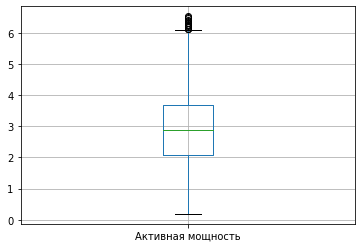

Реактивная мощность


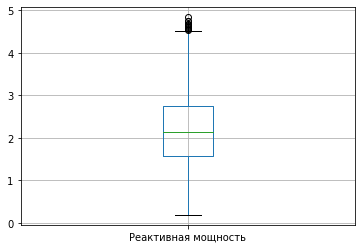

working_time


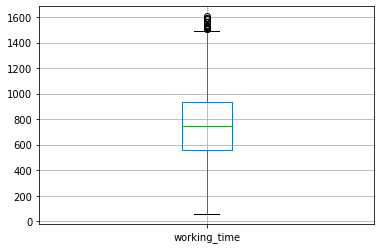

total_bulk


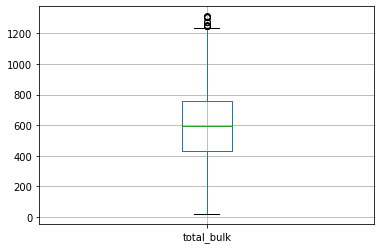

Газ 1


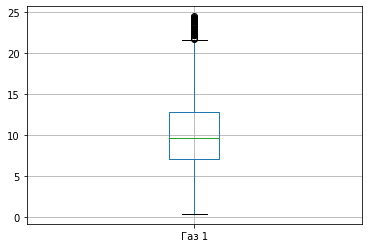

первый_замер_температуры


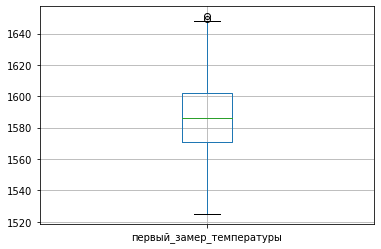

последний_замер_температуры


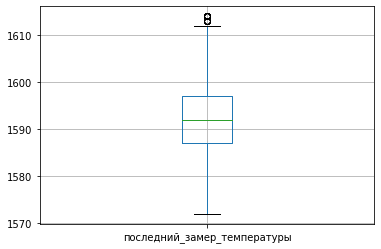

total_wire


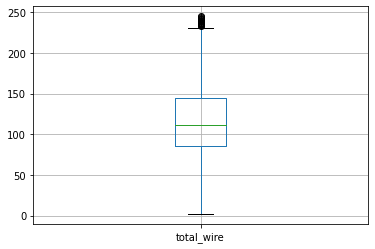

In [52]:
for i in col:
    print(i)
    df.boxplot(column=i)
    plt.show()

In [53]:
df.shape

(1956, 8)

### Conclusion

In this part we transformed and examined our data.

There were outliers in all tables. We did not remove outliers before grouping iterations (since the MAE value with this method will be lower - I checked), but removed outliers after we collected the data together in one table.

We removed iterations where the final temperature did not change. Such data is not suitable for us for training.

We collected all the data on the keys "key". We found a correlation for some indicators.

Let's move on to training models

## Model training

Let's divide the data into training and test samples in a ratio of 3:1

Let's prepare the data for linear regression

In [54]:
features_lr = df.drop(['последний_замер_температуры', 'Реактивная мощность', 'working_time'], axis=1)
target_lr = df['последний_замер_температуры']

features_train_lr, features_test_lr, target_train_lr, target_test_lr = train_test_split(
        features_lr, target_lr, test_size=0.25, random_state=12345)

Let's prepare data for other regression models

In [55]:
features = df.drop(['последний_замер_температуры'], axis=1)
target = df['последний_замер_температуры']

features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.25, random_state=12345)

Because Since all our features have different scales, we can use data scaling using StandardScaler only for linear regression

In [56]:
numeric = features_lr.columns
scaler = StandardScaler()
scaler.fit(features_train_lr[numeric])
features_train_lr[numeric] = scaler.transform(features_train_lr[numeric])
features_test_lr[numeric] = scaler.transform(features_test_lr[numeric])

/tmp/ipykernel_1347/3199382145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_lr[numeric] = scaler.transform(features_train_lr[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<b>Linear regression</b>

In [57]:
model_lr = LinearRegression()
scores = cross_val_score(model_lr, features_train_lr, target_train_lr, cv=10, scoring='neg_mean_absolute_error')
result = scores.mean() * -1

print('МАЕ на линейной регрессии:', result)

МАЕ на линейной регрессии: 5.4103931317594185


<b>Decision tree</b>

In [58]:
best_model = None
best_result = 10
best_depth = 0
for depth in range(1, 11):
    model_dr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores = cross_val_score(model_dr, features_train, target_train, cv=5, scoring='neg_mean_absolute_error')
    result = scores.mean() * -1
    if result < best_result:
        best_model = model_dr
        best_result = result
        best_depth = depth
        
print("MAE наилучшей модели на тестовой выборке:", best_result, "Глубина дерева:", best_depth)

MAE наилучшей модели на тестовой выборке: 5.852291011355065 Глубина дерева: 4


<b>Random Forest</b>

In [59]:
best_model = None
best_result = 10
best_est = 0
best_depth = 0
for est in range(50, 101, 5):
    for depth in range (10, 31):
        model_rf = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        scores = cross_val_score(model_rf, features_train, target_train, cv=5, scoring='neg_mean_absolute_error')
        result = scores.mean() * -1
        if result < best_result:
            best_model = model_rf
            best_result = result
            best_est = est
            best_depth = depth
            
print("MAE наилучшей модели на тестовой выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

MAE наилучшей модели на тестовой выборке: 5.3129487622923826 Количество деревьев: 95 Максимальная глубина: 30


<b>Testing the best model</b>

In [60]:
model_rf = RandomForestRegressor(random_state=12345, n_estimators=95, max_depth=30)
model_rf.fit(features_train, target_train)
prediction = model_rf.predict(features_test)
result = mean_absolute_error(target_test, prediction)
print('МАЕ на Случайный лес:', result)

МАЕ на Случайный лес: 5.5347110106554664


## Final conclusion

Based on the steel processing data we had, we were able to create a model that would predict the temperature of the steel, which would then lead to optimization of production energy costs.

Having tested 3 models, we can say that the best model for this task is Random Forest

Using the Random Forest model, we were able to achieve good MAE results - 5.53, with the number of trees - 95 and depth - 30

We did not need files with time (data_bulk_time, data_wire_time). For this model you can do without them.

We did not remove outliers before grouping each iteration, but did it after grouping, because It is this method that leads to the best performance of the model.

About 25% of all data were outliers and incorrect data. For example, in many iterations the temperature after the first measurement and the last one does not change, or only the first temperature measurement is present, which is not suitable for building a model. Therefore, it was decided to remove such data.